# Gather

In [1]:
import requests
import pandas as pd
import tweepy
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Download image_predictions file
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    response = requests.get(url)
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
#access twitter API

key = ''
secret_key = ''
token = ''
secret_token = ''

auth = tweepy.OAuthHandler(key, secret_key)
auth.set_access_token(token, secret_token)

api = tweepy.API(auth)

In [ ]:
#extract tweet status from twitter API

tweet_ids =list(twitter_archive['tweet_id'])
error =[]
with open('tweet-json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')._json
            json.dump(tweet_status, file)
            file.write('\n')
        
        except:
            print("Error : " + str(tweet_id))
            error.append(tweet_id)

In [5]:
#create pandas dataframe using JSON
tweets= pd.read_json('tweet-json.txt', lines = True,encoding ='utf-8')

# Assess

In [6]:
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy= image_predictions.copy()
tweets_copy= tweets.copy()

In [7]:
pd.set_option('display.max_colwidth', 500)

In [8]:
all_columns = pd.Series(list(twitter_archive_copy) + list(image_predictions_copy) + list(tweets_copy))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
57                   source
dtype: object

In [9]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [11]:
twitter_archive_copy[twitter_archive_copy.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [12]:
twitter_archive_copy[twitter_archive_copy.rating_numerator > 20].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


In [13]:
sum(twitter_archive_copy.name.isnull())

0

In [14]:
twitter_archive_copy.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [15]:
twitter_archive_copy.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
(twitter_archive_copy.loc[:] != 'None').sum()

tweet_id                      2356
in_reply_to_status_id         2356
in_reply_to_user_id           2356
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id           2356
retweeted_status_user_id      2356
retweeted_status_timestamp    2356
expanded_urls                 2356
rating_numerator              2356
rating_denominator            2356
name                          1611
doggo                           97
floofer                         10
pupper                         257
puppo                           30
dtype: int64

In [17]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

#### Quality
##### `twitter_archive` table
- Missing values for doggo, floofer, pupper and puppo
- NaNs is "None" (str) in (name, doggo, floofer, pupper, puppo)
- Some dog stage values extracted with errors
- Some extracted name not names
- Some extracted values for rating_numerator and rating_denominator has errors
- Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo)
- The dataset contains Retweets
- The dataset contains Replies

##### `image_predictions` table
- Erroneous datatype (tweet_id)

##### `tweet` table
- Erroneous datatype (id)

#### Tidiness
- There are multiple columns containing the same type of data. doggo, floofer, pupper, puppo all contain dog types
- retweet and faivorait count should be part of the `witter_archive` table
- There are multiple columns containing the same type of data. p1, p2, p3, p1_conf, p2_conf, p3_conf, dog_1, dog_2, dog_3

## Clean

### Missing Data

#### `twitter_archive`: Missing counts for doggo, floofer, pupper and puppo

##### Define
searching for dog stage in the tweet text and create a new culomn for to hold the values

##### Code

In [20]:
#convert to nan to know how many are there
twitter_archive_copy.name = twitter_archive_copy.name.replace('None', np.nan)
twitter_archive_copy.doggo = twitter_archive_copy.doggo.replace('None', np.nan)
twitter_archive_copy.floofer = twitter_archive_copy.floofer.replace('None', np.nan)
twitter_archive_copy.pupper = twitter_archive_copy.pupper.replace('None', np.nan)
twitter_archive_copy.puppo = twitter_archive_copy.puppo.replace('None', np.nan)

In [21]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

In [22]:
#create 4 colomn to store the dog stages that extracted from the text, -1 means it is not in the text
twitter_archive_copy["Indexes_doggo"]= twitter_archive_copy.text.str.lower().str.find('doggo')
twitter_archive_copy["Indexes_floofer"]= twitter_archive_copy.text.str.lower().str.find('floofer')
twitter_archive_copy["Indexes_pupper"]= twitter_archive_copy.text.str.lower().str.find('pupper')
twitter_archive_copy["Indexes_puppo"]= twitter_archive_copy.text.str.lower().str.find('puppo')

In [23]:
# if it is not -1 then the text is found , here change the indexes value with the dog stages
twitter_archive_copy.loc[twitter_archive_copy['Indexes_doggo'] != -1, 'Indexes_doggo'] = 'doggo'
twitter_archive_copy.loc[twitter_archive_copy['Indexes_floofer'] != -1, 'Indexes_floofer'] = 'floofer'
twitter_archive_copy.loc[twitter_archive_copy['Indexes_pupper'] != -1, 'Indexes_pupper'] = 'pupper'
twitter_archive_copy.loc[twitter_archive_copy['Indexes_puppo'] != -1, 'Indexes_puppo'] = 'puppo'

In [24]:
#convert to nan to know how many are there
twitter_archive_copy.Indexes_doggo = twitter_archive_copy.Indexes_doggo.replace(-1, np.nan)
twitter_archive_copy.Indexes_floofer = twitter_archive_copy.Indexes_floofer.replace(-1, np.nan)
twitter_archive_copy.Indexes_pupper = twitter_archive_copy.Indexes_pupper.replace(-1, np.nan)
twitter_archive_copy.Indexes_puppo = twitter_archive_copy.Indexes_puppo.replace(-1, np.nan)

In [25]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
Indexes_doggo                 107 non-n

In [26]:
#combine all in one culomn
twitter_archive_copy['dog_stages'] = twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    lambda x: ''.join(x.dropna()), axis=1)

In [27]:
#combine all in one culomn
twitter_archive_copy['dog_stages_new'] = twitter_archive_copy[['Indexes_doggo', 'Indexes_floofer', 'Indexes_pupper', 'Indexes_puppo']].apply(
    lambda x: ''.join(x.dropna()), axis=1)

In [28]:
twitter_archive_copy[['text','dog_stages','dog_stages_new']][twitter_archive_copy['dog_stages'] != twitter_archive_copy['dog_stages_new']].sample(5)


,text,dog_stages,dog_stages_new
2141,This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers https://t.co/kR1fqy4NKK,,pupper
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,,pupper
302,"RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",,doggo
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,,pupper
987,This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC,,doggo


In [29]:
twitter_archive_copy.dog_stages_new = twitter_archive_copy.dog_stages_new.replace('', np.nan)

In [30]:
twitter_archive_copy = twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo','Indexes_doggo', 'Indexes_floofer', 'Indexes_pupper', 'Indexes_puppo','dog_stages'], axis=1)

In [31]:
twitter_archive_copy.rename(columns={'dog_stages_new': 'dog_stages'}, inplace=True)

##### Test

In [32]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_stages                    423 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Tidiness

#### `twitter_archive`: Combine twitter_archive with tweet data sets

##### Define
combine tweet and reply counts to the twitter_archive dataset

##### Code

In [33]:
tweets=tweets[['id','retweet_count','favorite_count']]

In [34]:
tweets.rename(columns={'id': 'tweet_id'}, inplace=True)

In [35]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [36]:
twitter_archive_copy = pd.merge(left=twitter_archive_copy, right=tweets, how='left', on='tweet_id')

##### Test

In [37]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_stages                    423 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


#### `image_predictions`: There are multiple columns containing the same type of data. p1, p2, p3, p1_conf, p2_conf, p3_conf, dog_1, dog_2, dog_3

##### Define
combine the 9 columns into 3 columns

##### Code

In [38]:
#Change column names to be able to convert wide to long 
column = ['tweet_id', 'jpg_url', 'img_num', 
             'prediction1', 'confidence1', 'dog1', 
             'prediction2', 'confidence2', 'dog2', 
             'prediction3', 'confidence3', 'dog3']
image_predictions_copy.columns = column

In [39]:
#Convert wide to long
image_predictions_copy = pd.wide_to_long(image_predictions_copy, stubnames=['prediction', 'confidence', 'dog'],
                      i=['tweet_id', 'jpg_url', 'img_num'], j='confidence_order').reset_index()

##### Test

In [40]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,confidence_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [41]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
confidence_order    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


### Quality

#### `twitter_archive`: The dataset contains Retweets

##### Define
Delete retweets

##### Code

In [42]:
#delete retweets
twitter_archive_copy=twitter_archive_copy[twitter_archive_copy.retweeted_status_user_id.isnull()]

##### Test

In [43]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
dog_stages                    385 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 288.9+ KB


In [44]:
twitter_archive_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [45]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
dog_stages               385 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 237.9+ KB


#### `twitter_archive`: The dataset contains Replies

##### Define
Delete replies

##### Code

In [46]:
#delete replies
twitter_archive_copy=twitter_archive_copy[twitter_archive_copy.in_reply_to_status_id.isnull()]

##### Test

In [47]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     1494 non-null object
dog_stages               374 non-null object
retweet_count            2097 non-null float64
favorite_count           2097 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 229.4+ KB


In [48]:
twitter_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

In [49]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
dog_stages            374 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 196.6+ KB


#### `twitter_archive`: Some dog stage values extracted with errors

##### Define
correct the values manually

##### Code

In [50]:
twitter_archive_copy.dog_stages.value_counts()

pupper          246
doggo            79
puppo            28
doggopupper       9
floofer           9
doggopuppo        2
doggofloofer      1
Name: dog_stages, dtype: int64

In [51]:
twitter_archive_copy[['tweet_id','text','dog_stages']][twitter_archive_copy['dog_stages'] == 'doggopupper']

,tweet_id,text,dog_stages
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggopupper
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggopupper
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggopupper
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper
1063,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper
1113,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper


In [52]:
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 817777686764523521, 'dog_stages'] = 'pupper'
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 801115127852503040, 'dog_stages'] = 'pupper'
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 785639753186217984, 'dog_stages'] = 'doggo'

In [53]:
#these tweet has tow dogs so make half of them pupper
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 808106460588765185, 'dog_stages'] = 'pupper'
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 781308096455073793, 'dog_stages'] = 'pupper'
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 759793422261743616, 'dog_stages'] = 'pupper'
#and half doggo
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 751583847268179968, 'dog_stages'] = 'doggo'
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 741067306818797568, 'dog_stages'] = 'doggo'
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 733109485275860992, 'dog_stages'] = 'doggo'

In [54]:
twitter_archive_copy[['tweet_id','text','dog_stages']][twitter_archive_copy['dog_stages'] == 'doggopuppo']

,tweet_id,text,dog_stages
172,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,doggopuppo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo


In [55]:
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 858843525470990336, 'dog_stages'] = 'doggo'
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 855851453814013952, 'dog_stages'] = 'puppo'

In [56]:
twitter_archive_copy[['tweet_id','text','dog_stages']][twitter_archive_copy['dog_stages'] == 'doggofloofer']

,tweet_id,text,dog_stages
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer


In [57]:
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 854010172552949760, 'dog_stages'] = 'floofer'

##### Test

In [58]:
twitter_archive_copy.dog_stages.value_counts()

pupper     251
doggo       84
puppo       29
floofer     10
Name: dog_stages, dtype: int64

#### `twitter_archive`: Some extracted name not names

##### Define
searching for dog name in the name that start with capital letter

##### Code

In [59]:
#extract name that start with capital letter
twitter_archive_copy['name_new'] = twitter_archive_copy.name.str.extract('([A-Z][a-zA-Z]+)', expand=True)

In [60]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
dog_stages            374 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
name_new              1388 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 213.0+ KB


In [61]:
#value count for the new name column that does not match name column
twitter_archive_copy[['text','name','name_new']][twitter_archive_copy['name'] != twitter_archive_copy['name_new']].name_new.value_counts()

Fl       2
Olivi    2
Fr       1
Ralph    1
Am       1
Dev      1
Name: name_new, dtype: int64

In [62]:
#value count for the name column that does not match new name column
twitter_archive_copy[['text','name','name_new']][twitter_archive_copy['name'] != twitter_archive_copy['name_new']].name.value_counts()

a               55
the              8
an               6
one              4
very             4
just             3
quite            3
Oliviér          2
not              2
Flávio           2
actually         2
getting          2
Frönq            1
life             1
O                1
Ralphé           1
my               1
Devón            1
by               1
incredibly       1
such             1
all              1
space            1
infuriating      1
officially       1
light            1
old              1
Gòrdón           1
this             1
Amélie           1
mad              1
unacceptable     1
his              1
Name: name, dtype: int64

In [63]:
#name with Special character
twitter_archive_copy.loc[twitter_archive_copy['name'] == 'Oliviér', 'name_new'] = 'Oliviér'
twitter_archive_copy.loc[twitter_archive_copy['name'] == 'Flávio', 'name_new'] = 'Flávio'
twitter_archive_copy.loc[twitter_archive_copy['name'] == 'Frönq', 'name_new'] = 'Frönq'
twitter_archive_copy.loc[twitter_archive_copy['name'] == 'Amélie', 'name_new'] = 'Amélie'
twitter_archive_copy.loc[twitter_archive_copy['name'] == 'Devón', 'name_new'] = 'Devón'
twitter_archive_copy.loc[twitter_archive_copy['name'] == 'Ralphé', 'name_new'] = 'Ralphé'
twitter_archive_copy.loc[twitter_archive_copy['name'] == 'Gòrdón', 'name_new'] = 'Gòrdón'

##### Test

In [64]:
twitter_archive_copy[['text','name','name_new']][twitter_archive_copy['name'] != twitter_archive_copy['name_new']].name_new.value_counts()

Series([], Name: name_new, dtype: int64)

In [65]:
twitter_archive_copy[['text','name','name_new']][twitter_archive_copy['name'] != twitter_archive_copy['name_new']].name.value_counts()

a               55
the              8
an               6
very             4
one              4
just             3
quite            3
actually         2
getting          2
not              2
light            1
O                1
my               1
incredibly       1
life             1
such             1
all              1
this             1
space            1
infuriating      1
old              1
by               1
his              1
mad              1
unacceptable     1
officially       1
Name: name, dtype: int64

In [66]:
twitter_archive_copy = twitter_archive_copy.drop(['name'], axis=1)

In [67]:
twitter_archive_copy.rename(columns={'name_new': 'name'}, inplace=True)

In [68]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
dog_stages            374 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
name                  1389 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 196.6+ KB


#### `twitter_archive`: Some extracted values for rating_numerator and rating_denominator has errors

##### Define
correct the values

##### Code

In [69]:
twitter_archive_copy[['tweet_id','text','rating_numerator','rating_denominator']][twitter_archive_copy.rating_denominator < 10]

,tweet_id,text,rating_numerator,rating_denominator
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [70]:
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 666287406224695296, ['rating_numerator','rating_denominator']] = [9,10]
twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == 810984652412424192, ['rating_numerator','rating_denominator']] = [np.nan,np.nan]

##### Test

In [71]:
twitter_archive_copy[['tweet_id','text','rating_numerator','rating_denominator']][twitter_archive_copy.rating_denominator < 10]

,tweet_id,text,rating_numerator,rating_denominator


In [72]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
dog_stages            374 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
name                  1389 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 196.6+ KB


#### `twitter_archive`: Erroneous datatypes ()

##### Define
correct the data types

##### Code

In [73]:
#convert type
twitter_archive_copy.tweet_id = twitter_archive_copy.tweet_id.astype(str)
twitter_archive_copy.timestamp = twitter_archive_copy.timestamp.astype('datetime64[ns]')
twitter_archive_copy.dog_stages = twitter_archive_copy.dog_stages.astype("category")
twitter_archive_copy.retweet_count = twitter_archive_copy.retweet_count.astype('int64')
twitter_archive_copy.favorite_count = twitter_archive_copy.favorite_count.astype('int64')

##### Test

In [74]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
dog_stages            374 non-null category
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
name                  1389 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 182.4+ KB


### Save datasets

In [75]:
twitter_archive_copy.to_csv('twitter_archive_master.csv', index=False)
image_predictions_copy.to_csv('image_predictions_master.csv', index=False)

### Insight and Visualize

In [76]:
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('image_predictions_master.csv')

In [77]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
dog_stages            374 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
name                  1389 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 180.3+ KB


In [78]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
confidence_order    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


In [79]:
archive.tweet_id = archive.tweet_id.astype(str)
archive.dog_stages = archive.dog_stages.astype("category")
archive.timestamp = archive.timestamp.astype('datetime64[ns]')
predictions.tweet_id = predictions.tweet_id.astype(str)
predictions.confidence_order = predictions.confidence_order.astype("category")

In [80]:
archive[['retweet_count','favorite_count']].max()

retweet_count      79515
favorite_count    132810
dtype: int64

In [81]:
archive[archive['retweet_count']== 79515]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,retweet_count,favorite_count,name
825,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,doggo,79515,131075,NaN


In [82]:
archive[archive['favorite_count']== 132810]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,retweet_count,favorite_count,name
325,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,puppo,48265,132810,NaN


In [83]:
archive.groupby([archive['timestamp'].dt.year,archive['timestamp'].dt.month])['tweet_id'].count()

timestamp  timestamp
2015       11           296
           12           372
2016       1            183
           2            121
           3            132
           4             60
           5             59
           6             90
           7             96
           8             61
           9             69
           10            72
           11            54
           12            57
2017       1             69
           2             68
           3             52
           4             42
           5             43
           6             48
           7             51
           8              2
Name: tweet_id, dtype: int64

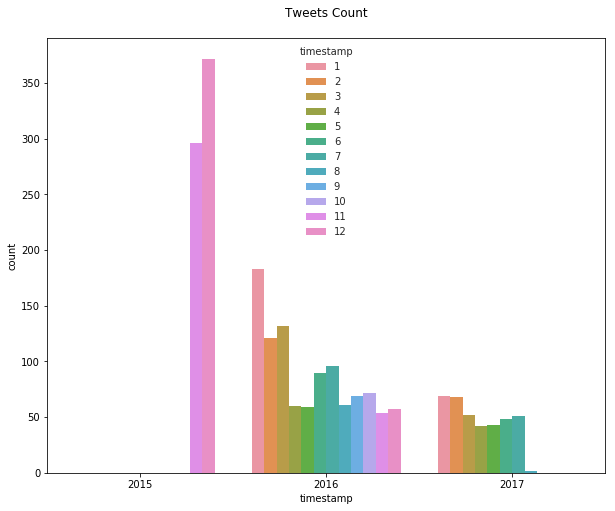

In [84]:
plt.figure(figsize=(10,8))
plt.title('Tweets Count\n')
sns.set_style("whitegrid")
sns.countplot(x=archive['timestamp'].dt.year, hue= archive['timestamp'].dt.month, data=archive)

In [85]:
archive.name.value_counts().reset_index(name='count').head(10)

,index,count
0,Charlie,11
1,Lucy,11
2,Cooper,10
3,Oliver,10
4,Tucker,9
5,Penny,9
6,Sadie,8
7,Winston,8
8,Lola,8
9,Toby,7


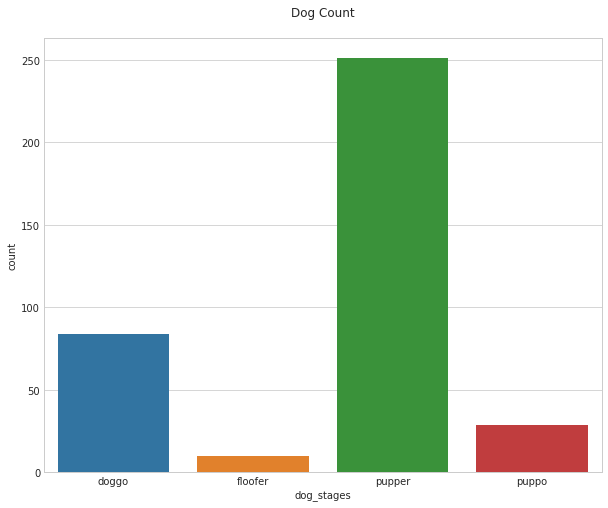

In [86]:
plt.figure(figsize=(10,8))
plt.title('Dog Count\n')
sns.set_style("whitegrid")
sns.countplot(x=archive['dog_stages'], data=archive)

In [87]:
archive.groupby([archive['dog_stages']])['retweet_count'].sum().reset_index(name='retweet sum')

,dog_stages,retweet sum
0,doggo,524595
1,floofer,40836
2,pupper,607411
3,puppo,199682


In [88]:
archive.groupby([archive['dog_stages']])['favorite_count'].sum().reset_index(name='favorite sum')

,dog_stages,favorite sum
0,doggo,1444095
1,floofer,116749
2,pupper,1790334
3,puppo,663222


In [89]:
archive.groupby([archive['dog_stages']])['retweet_count'].mean().reset_index(name='retweet mean')

,dog_stages,retweet mean
0,doggo,6245.178571
1,floofer,4083.600000
2,pupper,2419.964143
3,puppo,6885.586207


In [90]:
archive.groupby([archive['dog_stages']])['favorite_count'].mean().reset_index(name='favorite mean')

,dog_stages,favorite mean
0,doggo,17191.607143
1,floofer,11674.900000
2,pupper,7132.804781
3,puppo,22869.724138


In [91]:
predictions[predictions.dog == True].groupby(['prediction'])['tweet_id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,prediction,count
93,golden_retriever,290
39,Labrador_retriever,283
16,Chihuahua,185
51,Pembroke,143
14,Cardigan,115
52,Pomeranian,109
113,toy_poodle,105
106,pug,97
85,chow,96
87,cocker_spaniel,95
